<a href="https://colab.research.google.com/github/JuanS286/gif_auto_audio_description/blob/master/key_frame_extraction_mt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kheshini Budhna (C0909662)

Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 7372.8
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 7372.8
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 7372.8
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 7372.8
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 7372.8
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 7372.8
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 7372.8
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero pixel count = 12027, Threshold = 7372.8
Frame 9: Key

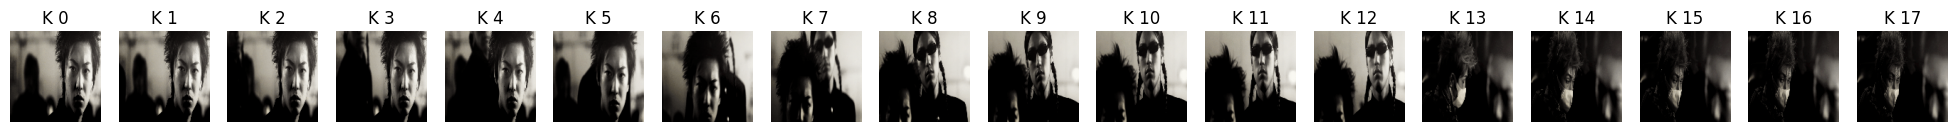

In [ ]:
import imageio
import cv2
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def resize_and_normalize_frame(frame, target_size=(128, 128)):
    """Resize and normalize the frame."""
    # Resize the frame
    resized_frame = cv2.resize(frame, target_size)
    # Normalize pixel values to the range [0, 1]
    normalized_frame = resized_frame.astype(np.float32) / 255.0
    return normalized_frame

def extract_key_frames(frames, threshold):
    key_frames = []
    prev_frame = None

    for i, frame in enumerate(frames):
        # Ensure the frame is a NumPy array
        if not isinstance(frame, np.ndarray):
            print(f"Frame {i}: Not a valid NumPy array.")
            continue

        # Check if the frame is empty or has invalid dimensions
        if frame.size == 0 or len(frame.shape) != 3:
            print(f"Frame {i}: Empty or has invalid dimensions: {frame.shape if isinstance(frame, np.ndarray) else 'N/A'}")
            continue

        # Convert the frame from RGB to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # If this is the first frame, automatically consider it a key frame
        if prev_frame is None:
            key_frames.append(frame)
            print(f"Frame {i}: Key frame extracted (first frame).")
            prev_frame = gray_frame
            continue

        # Calculate the difference between the current frame and the previous frame
        frame_diff = cv2.absdiff(prev_frame, gray_frame)
        non_zero_count = np.count_nonzero(frame_diff)  # Count significant changes

        # If the difference exceeds the threshold, consider it a key frame
        if non_zero_count > threshold * gray_frame.size / 100:
            key_frames.append(frame)
            print(f"Frame {i}: Key frame extracted (significant change detected).")
            print(f"Frame {i}: Non-zero pixel count = {non_zero_count}, Threshold = {threshold * gray_frame.size / 100}")

        prev_frame = gray_frame

    return key_frames

# Fetch GIF from a URL
gif_url = 'https://38.media.tumblr.com/9f6c25cc350f12aa74a7dc386a5c4985/tumblr_mevmyaKtDf1rgvhr8o1_500.gif'  # Replace with your GIF URL
response = requests.get(gif_url)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to fetch the GIF. Status code: {response.status_code}")
else:
    # Read the GIF from the response
    gif = imageio.mimread(BytesIO(response.content))

    # Resize and normalize frames before key frame extraction
    processed_frames = [resize_and_normalize_frame(frame) for frame in gif]

    # Extract key frames from original frames
    key_frames = extract_key_frames(processed_frames, 45)

    # Display key frames using matplotlib
    if key_frames:
        plt.figure(figsize=(25, 15))
        for idx, kf in enumerate(key_frames):
            plt.subplot(1, len(key_frames), idx + 1)
            plt.imshow(kf)
            plt.axis('off')
            plt.title(f'K {idx}')
        plt.show()
    else:
        print("No key frames extracted.")

    # Optionally, save the key frames as images
    for idx, kf in enumerate(key_frames):
        # Convert back to 8-bit for saving
        kf_to_save = (kf * 255).astype(np.uint8)
        cv2.imwrite(f'key_frame_{idx}.png', cv2.cvtColor(kf_to_save, cv2.COLOR_RGB2BGR))  # Save as PNG


Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 11878.4
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 11878.4
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 11878.4
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 11878.4
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero pixel count = 12027, Threshold = 11878.4
Frame 13: Key frame extracted (significant change detected).
Frame 13: Non-zero pixel count = 12848, Threshold = 11878.4


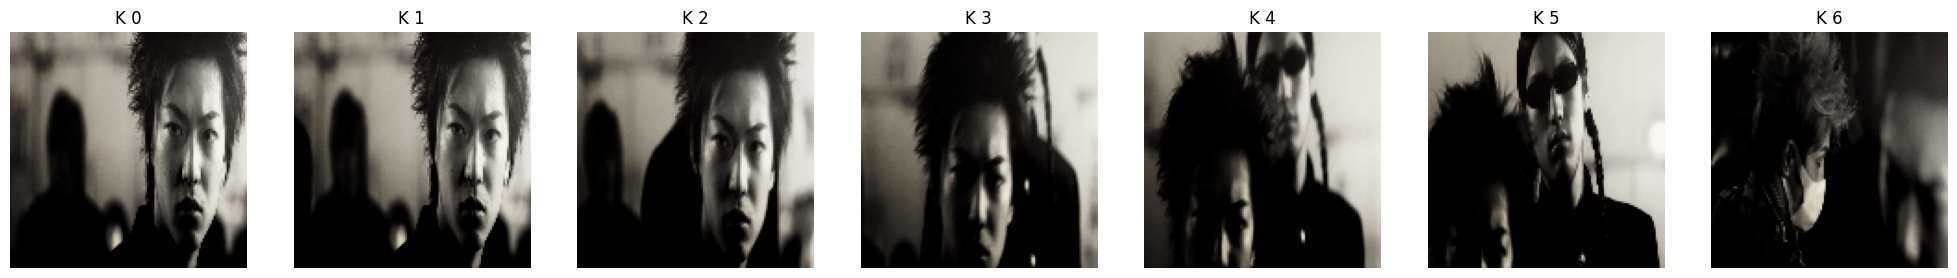

In [ ]:
import imageio
import cv2
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def resize_and_normalize_frame(frame, target_size=(128, 128)):
    """Resize and normalize the frame."""
    # Resize the frame
    resized_frame = cv2.resize(frame, target_size)
    # Normalize pixel values to the range [0, 1]
    normalized_frame = resized_frame.astype(np.float32) / 255.0
    return normalized_frame

def extract_key_frames(frames, threshold):
    key_frames = []
    prev_frame = None

    for i, frame in enumerate(frames):
        # Ensure the frame is a NumPy array
        if not isinstance(frame, np.ndarray):
            print(f"Frame {i}: Not a valid NumPy array.")
            continue

        # Check if the frame is empty or has invalid dimensions
        if frame.size == 0 or len(frame.shape) != 3:
            print(f"Frame {i}: Empty or has invalid dimensions: {frame.shape if isinstance(frame, np.ndarray) else 'N/A'}")
            continue

        # Convert the frame from RGB to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # If this is the first frame, automatically consider it a key frame
        if prev_frame is None:
            key_frames.append(frame)
            print(f"Frame {i}: Key frame extracted (first frame).")
            prev_frame = gray_frame
            continue

        # Calculate the difference between the current frame and the previous frame
        frame_diff = cv2.absdiff(prev_frame, gray_frame)
        non_zero_count = np.count_nonzero(frame_diff)  # Count significant changes

        # If the difference exceeds the threshold, consider it a key frame
        if non_zero_count > threshold * gray_frame.size / 100:
            key_frames.append(frame)
            print(f"Frame {i}: Key frame extracted (significant change detected).")
            print(f"Frame {i}: Non-zero pixel count = {non_zero_count}, Threshold = {threshold * gray_frame.size / 100}")

        prev_frame = gray_frame

    return key_frames

# Fetch GIF from a URL
gif_url = 'https://38.media.tumblr.com/9f6c25cc350f12aa74a7dc386a5c4985/tumblr_mevmyaKtDf1rgvhr8o1_500.gif'  # Replace with your GIF URL
response = requests.get(gif_url)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to fetch the GIF. Status code: {response.status_code}")
else:
    # Read the GIF from the response
    gif = imageio.mimread(BytesIO(response.content))

    # Resize and normalize frames before key frame extraction
    processed_frames = [resize_and_normalize_frame(frame) for frame in gif]

    # Extract key frames from original frames
    key_frames = extract_key_frames(processed_frames, 72.5)

    # Display key frames using matplotlib
    if key_frames:
        plt.figure(figsize=(25, 15))
        for idx, kf in enumerate(key_frames):
            plt.subplot(1, len(key_frames), idx + 1)
            plt.imshow(kf)
            plt.axis('off')
            plt.title(f'K {idx}')
        plt.show()
    else:
        print("No key frames extracted.")

    # Optionally, save the key frames as images
    for idx, kf in enumerate(key_frames):
        # Convert back to 8-bit for saving
        kf_to_save = (kf * 255).astype(np.uint8)
        cv2.imwrite(f'key_frame_{idx}.png', cv2.cvtColor(kf_to_save, cv2.COLOR_RGB2BGR))  # Save as PNG



--- Extracting key frames with threshold: 5% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 819.2
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 819.2
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 819.2
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 819.2
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 819.2
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 819.2
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 819.2
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero pixel cou

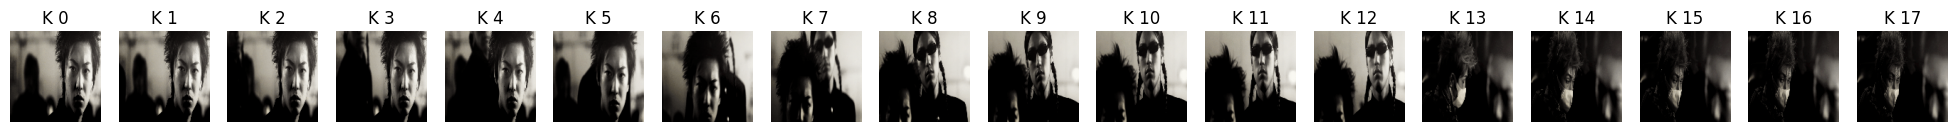


--- Extracting key frames with threshold: 10% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 1638.4
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 1638.4
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 1638.4
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 1638.4
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 1638.4
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 1638.4
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 1638.4
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

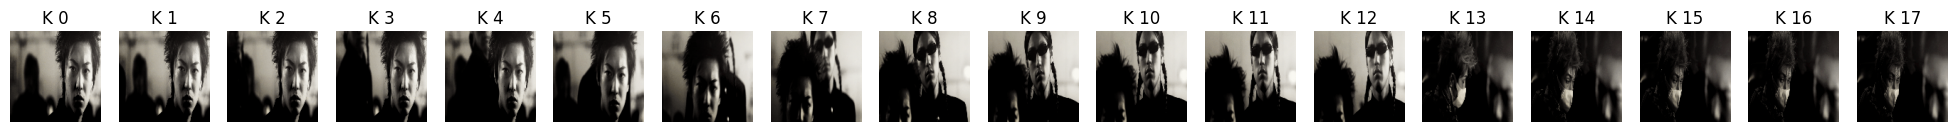


--- Extracting key frames with threshold: 15% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 2457.6
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 2457.6
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 2457.6
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 2457.6
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 2457.6
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 2457.6
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 2457.6
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

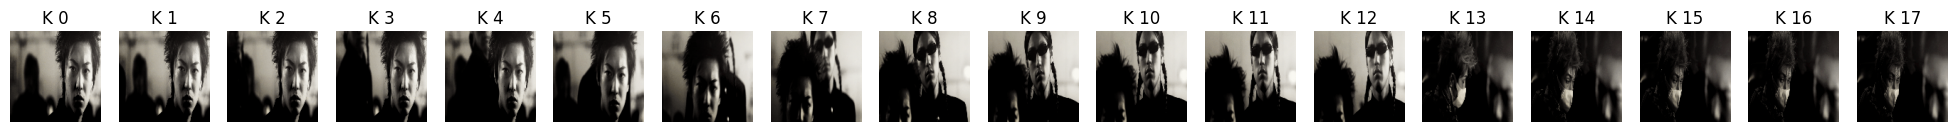


--- Extracting key frames with threshold: 20% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 3276.8
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 3276.8
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 3276.8
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 3276.8
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 3276.8
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 3276.8
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 3276.8
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

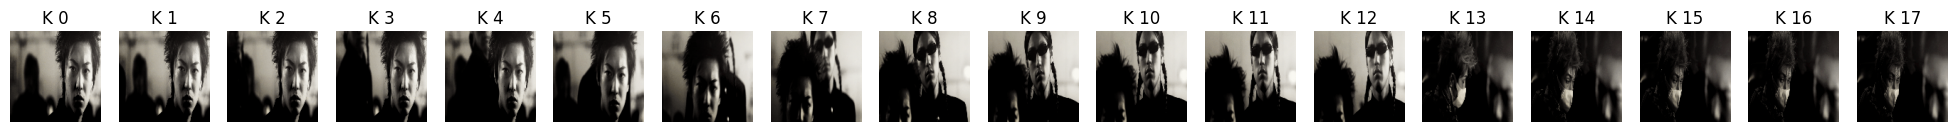


--- Extracting key frames with threshold: 25% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 4096.0
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 4096.0
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 4096.0
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 4096.0
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 4096.0
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 4096.0
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 4096.0
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

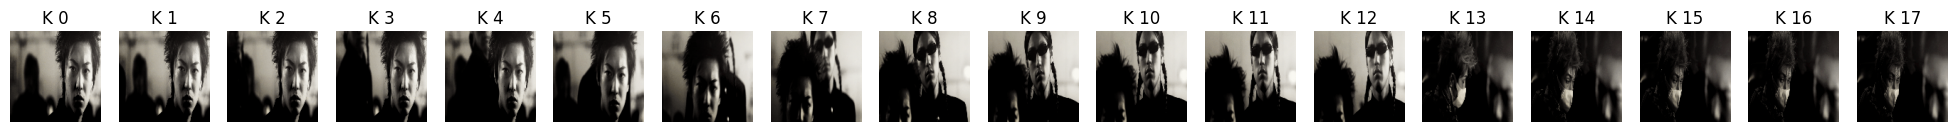


--- Extracting key frames with threshold: 30% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 4915.2
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 4915.2
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 4915.2
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 4915.2
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 4915.2
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 4915.2
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 4915.2
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

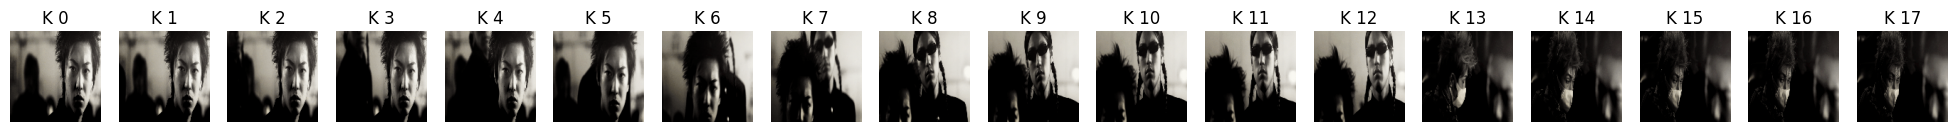


--- Extracting key frames with threshold: 35% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 5734.4
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 5734.4
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 5734.4
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 5734.4
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 5734.4
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 5734.4
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 5734.4
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

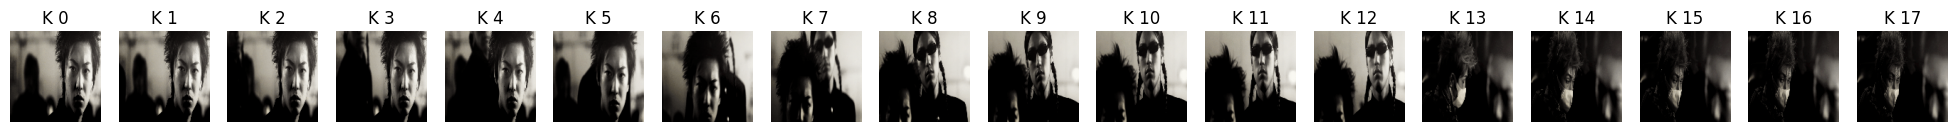


--- Extracting key frames with threshold: 40% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 6553.6
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 6553.6
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 6553.6
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 6553.6
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 6553.6
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 6553.6
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 6553.6
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

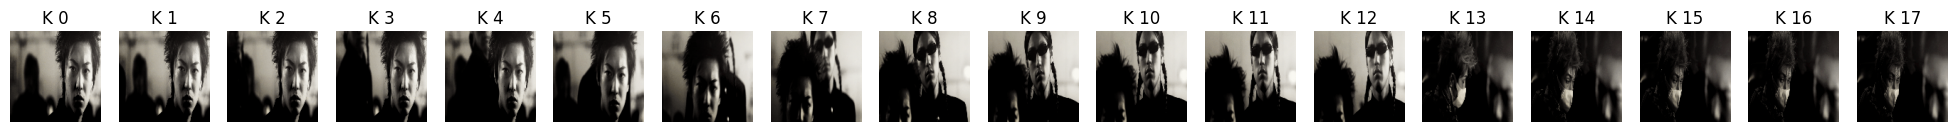


--- Extracting key frames with threshold: 45% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 7372.8
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 7372.8
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 7372.8
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 7372.8
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 7372.8
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 7372.8
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 7372.8
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

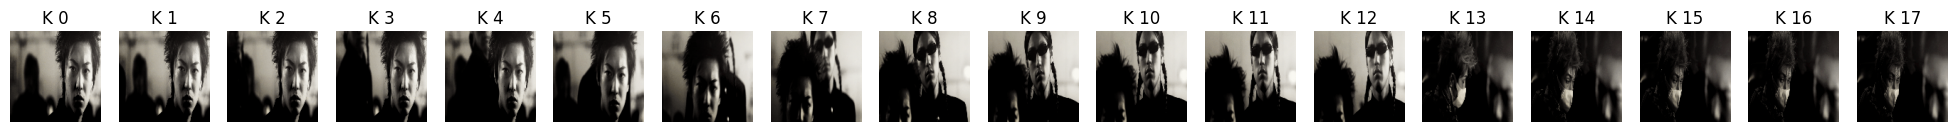


--- Extracting key frames with threshold: 50% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 8192.0
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 8192.0
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 8192.0
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 8192.0
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 8192.0
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 8192.0
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 8192.0
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

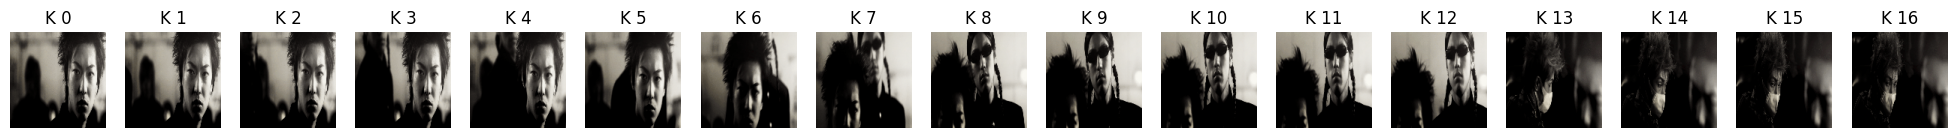


--- Extracting key frames with threshold: 55% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 9011.2
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 9011.2
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 9011.2
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 9011.2
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 9011.2
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 9011.2
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 9011.2
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

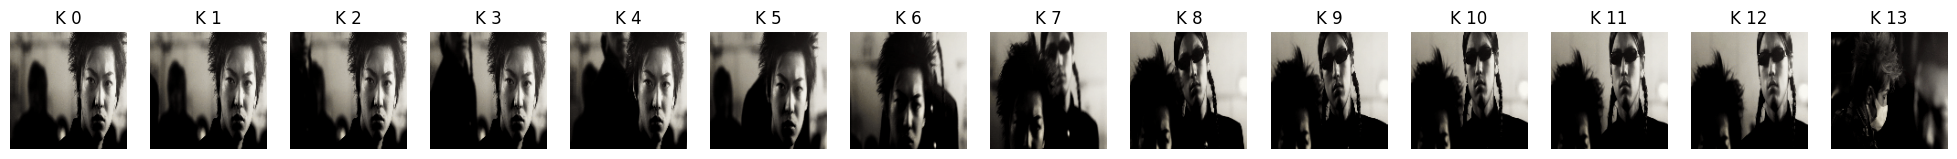


--- Extracting key frames with threshold: 60% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 9830.4
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 9830.4
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 9830.4
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 9830.4
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 9830.4
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 9830.4
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 9830.4
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero p

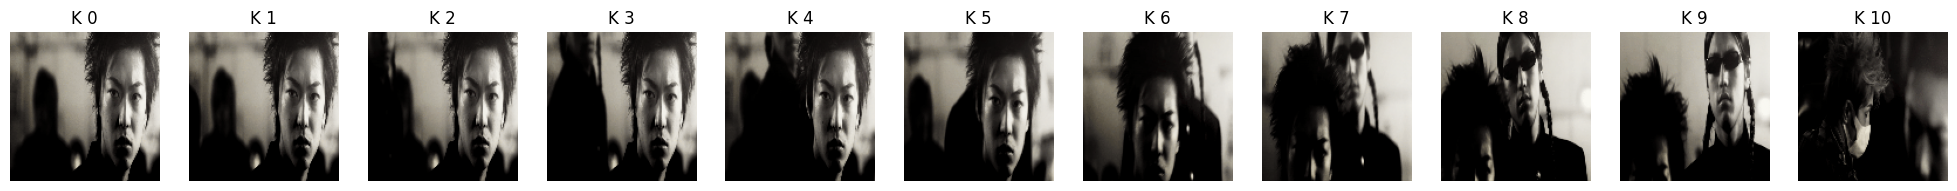


--- Extracting key frames with threshold: 65% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 10649.6
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 10649.6
Frame 3: Key frame extracted (significant change detected).
Frame 3: Non-zero pixel count = 11248, Threshold = 10649.6
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 10649.6
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 10649.6
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 10649.6
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 10649.6
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non

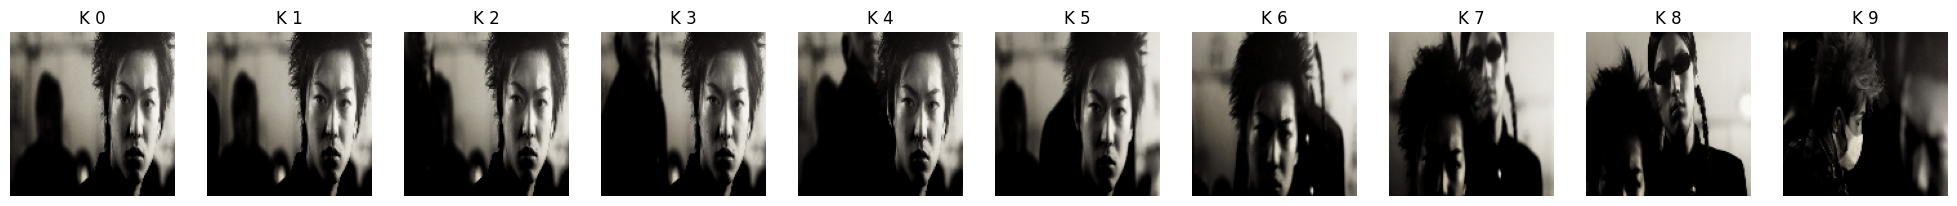


--- Extracting key frames with threshold: 70% ---
Frame 0: Key frame extracted (first frame).
Frame 1: Key frame extracted (significant change detected).
Frame 1: Non-zero pixel count = 12152, Threshold = 11468.8
Frame 2: Key frame extracted (significant change detected).
Frame 2: Non-zero pixel count = 11773, Threshold = 11468.8
Frame 4: Key frame extracted (significant change detected).
Frame 4: Non-zero pixel count = 11683, Threshold = 11468.8
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 11468.8
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 11468.8
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 11468.8
Frame 8: Key frame extracted (significant change detected).
Frame 8: Non-zero pixel count = 12027, Threshold = 11468.8
Frame 13: Key frame extracted (significant change detected).
Frame 13: N

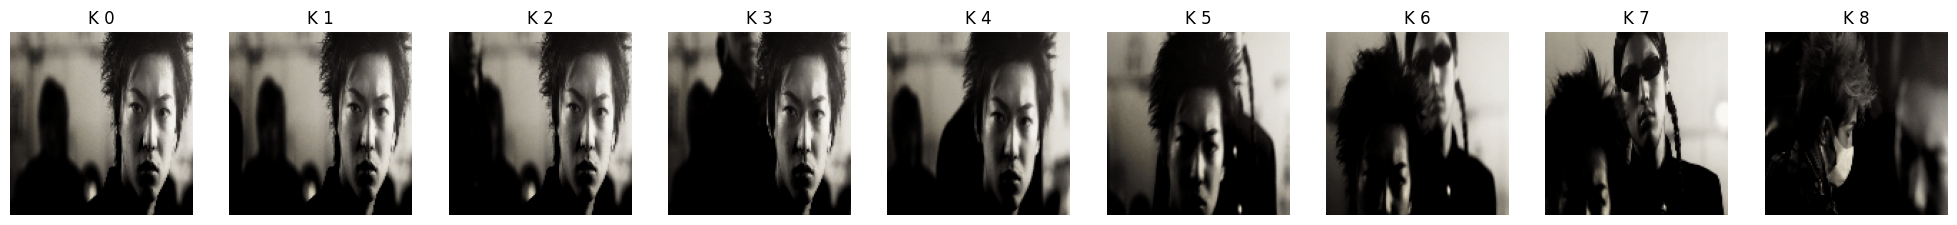


--- Extracting key frames with threshold: 75% ---
Frame 0: Key frame extracted (first frame).
Frame 5: Key frame extracted (significant change detected).
Frame 5: Non-zero pixel count = 12509, Threshold = 12288.0
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 12288.0
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 12288.0
Frame 13: Key frame extracted (significant change detected).
Frame 13: Non-zero pixel count = 12848, Threshold = 12288.0


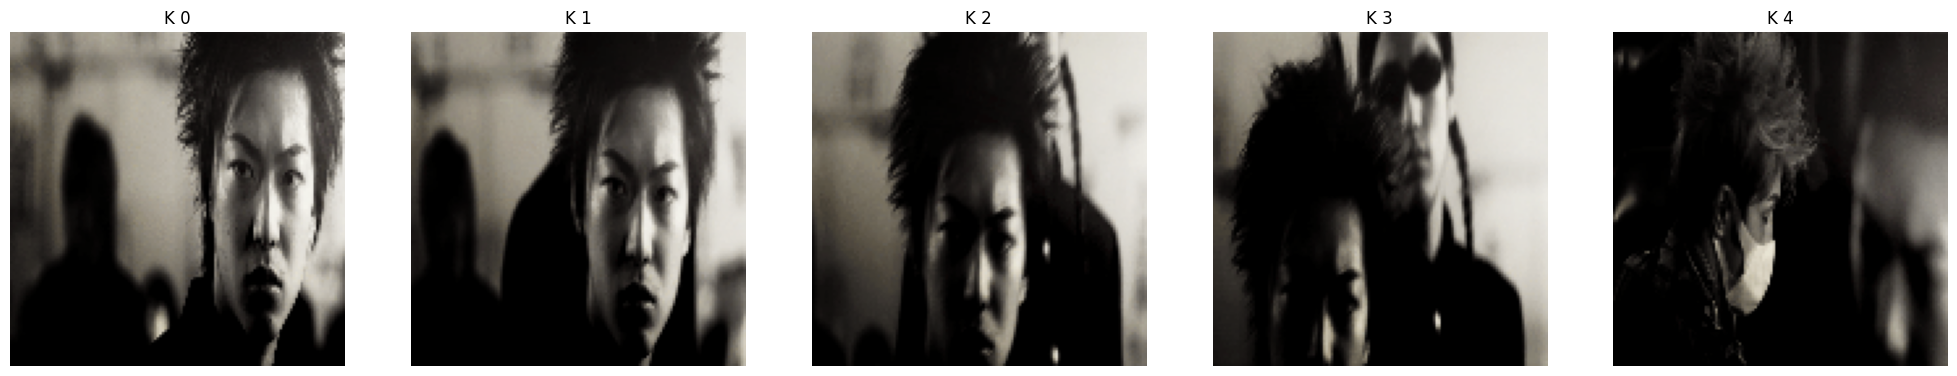


--- Extracting key frames with threshold: 80% ---
Frame 0: Key frame extracted (first frame).
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 13107.2
Frame 7: Key frame extracted (significant change detected).
Frame 7: Non-zero pixel count = 13893, Threshold = 13107.2


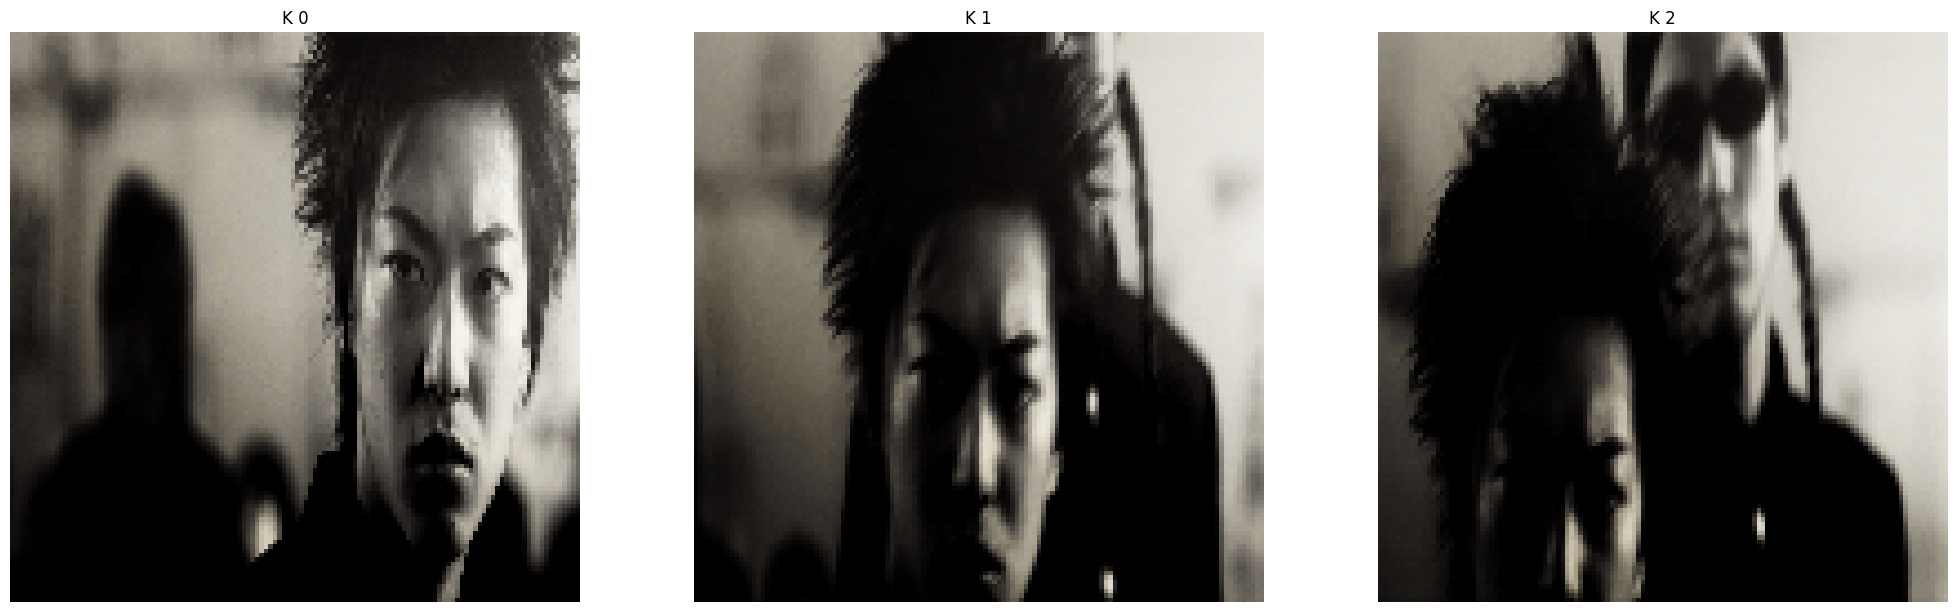


--- Extracting key frames with threshold: 85% ---
Frame 0: Key frame extracted (first frame).
Frame 6: Key frame extracted (significant change detected).
Frame 6: Non-zero pixel count = 14367, Threshold = 13926.4


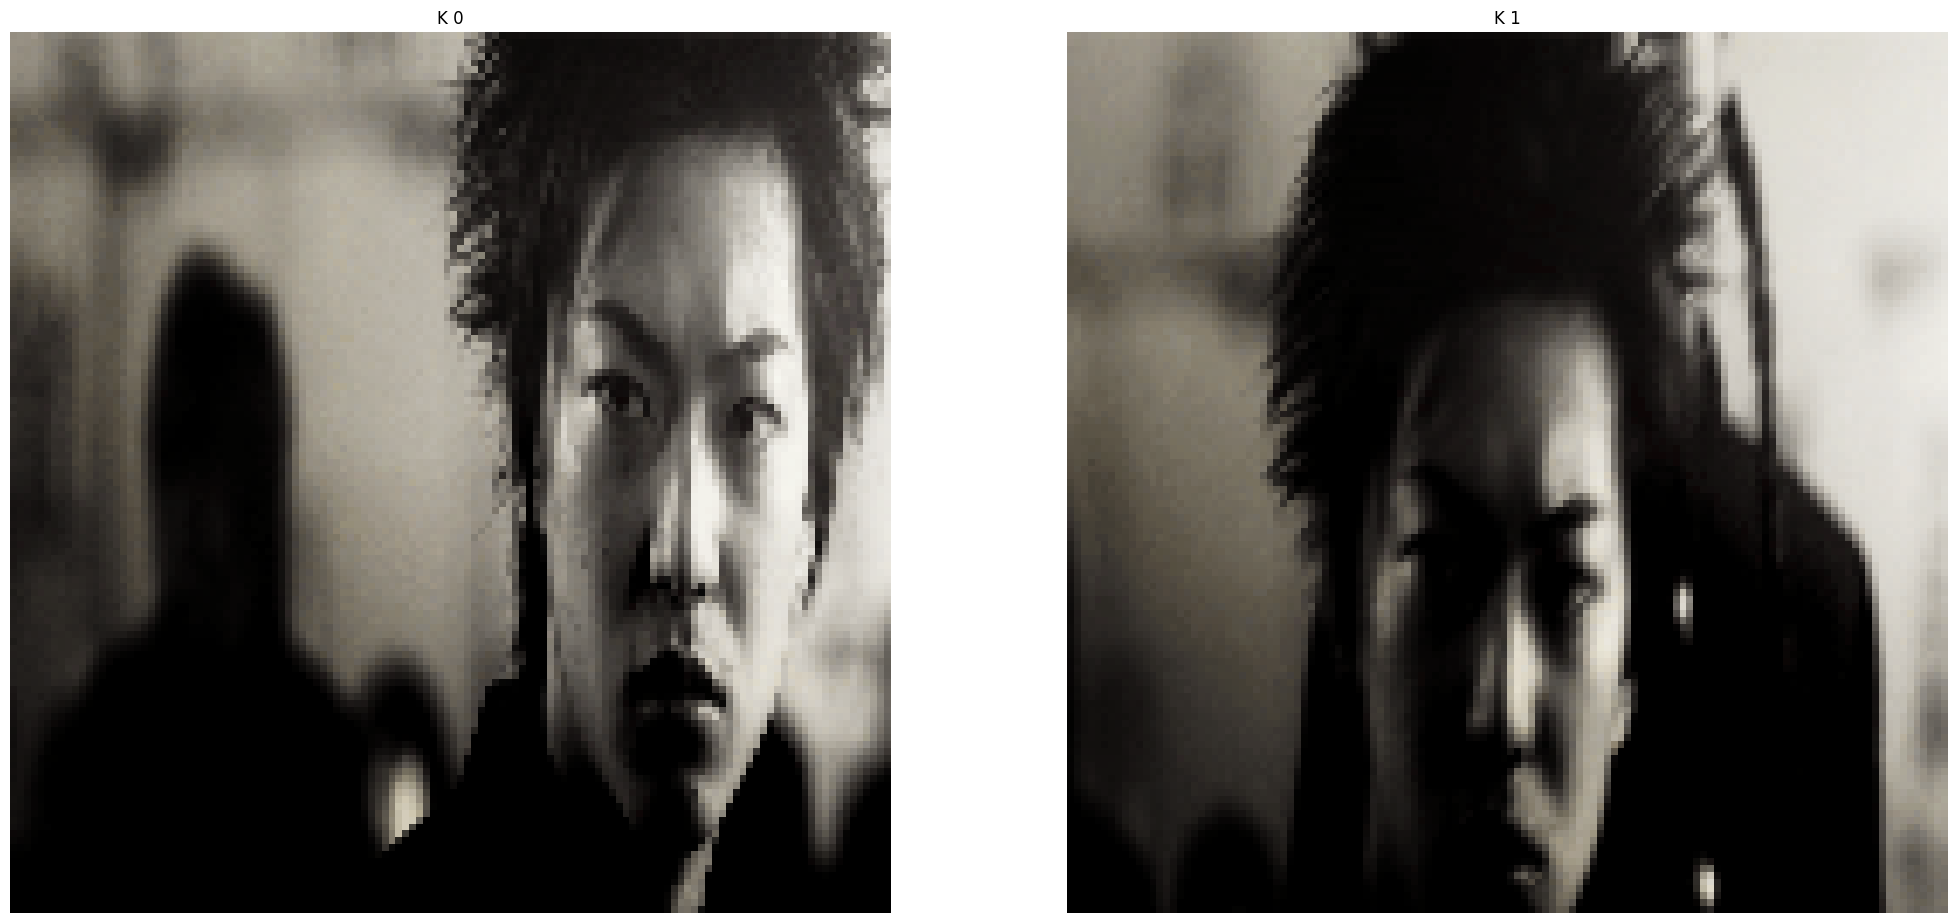


--- Extracting key frames with threshold: 90% ---
Frame 0: Key frame extracted (first frame).


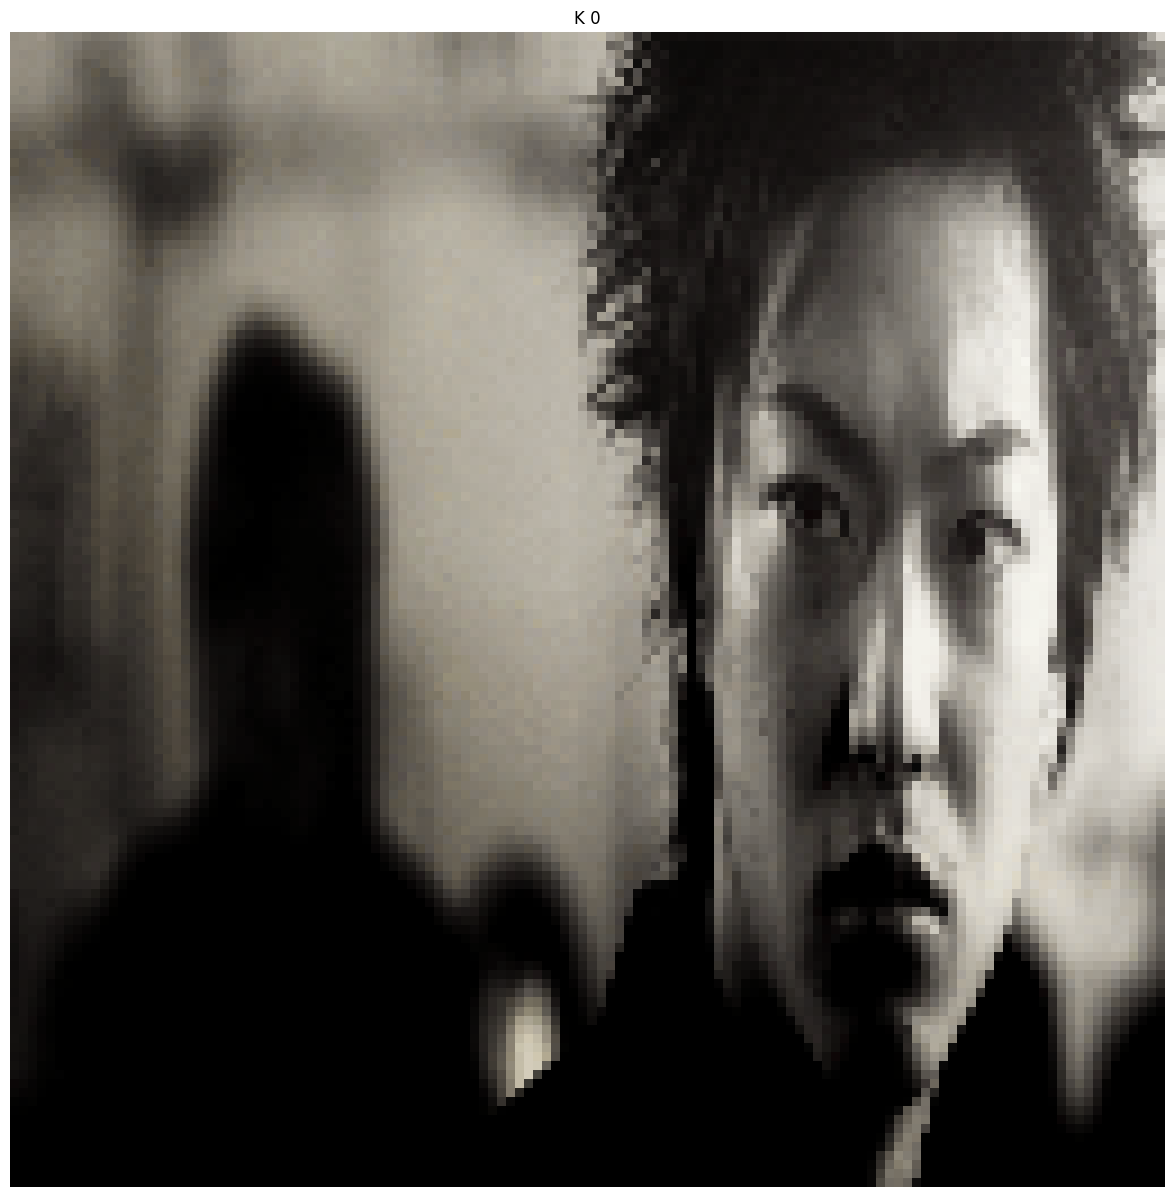


--- Extracting key frames with threshold: 95% ---
Frame 0: Key frame extracted (first frame).


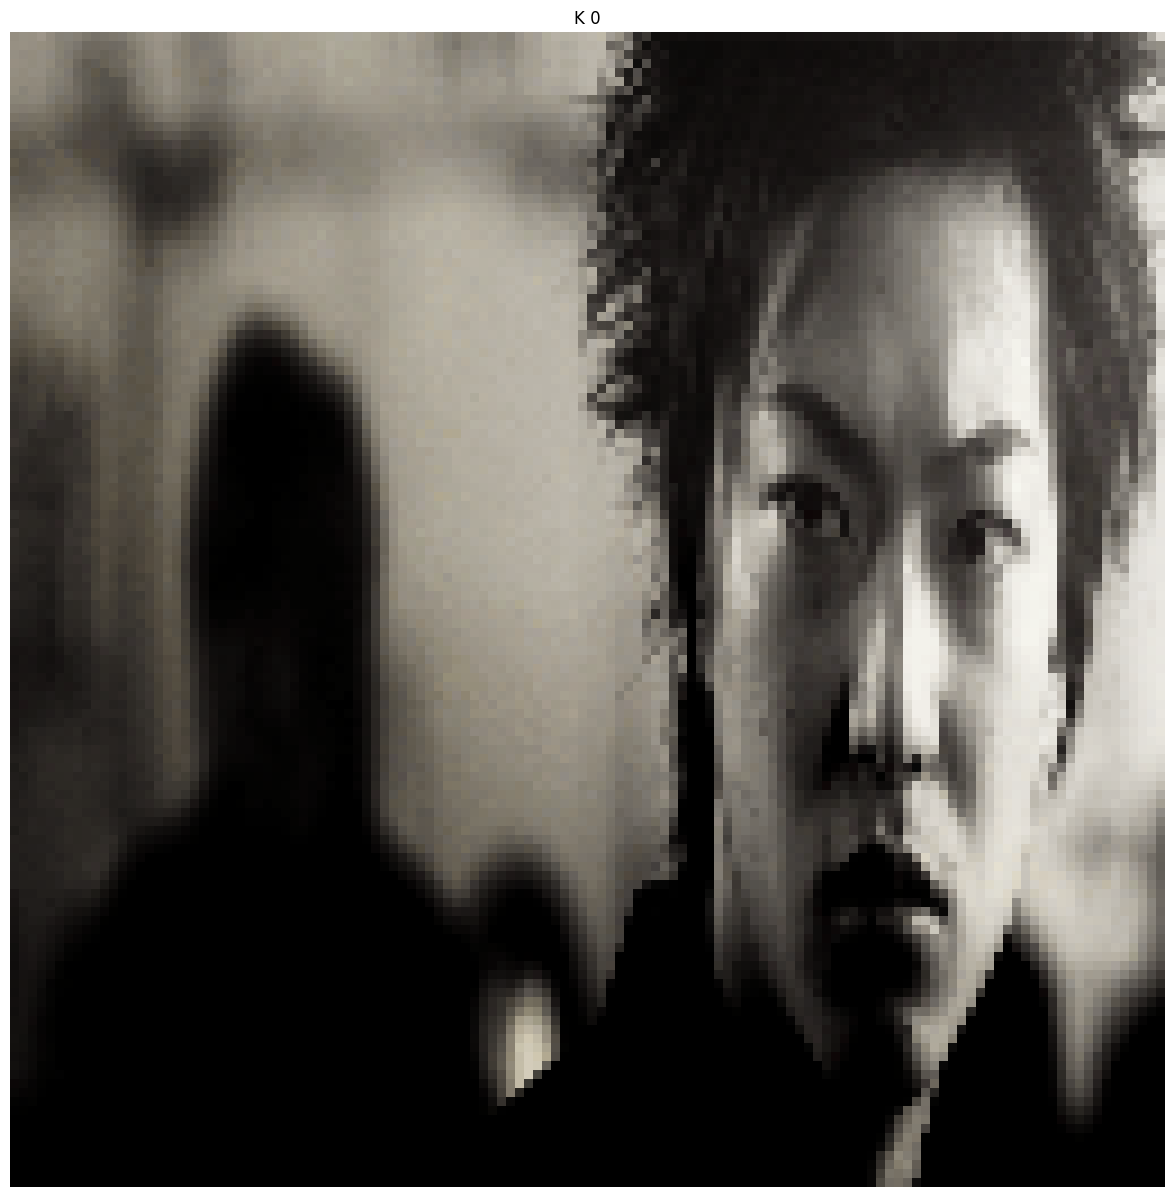

In [ ]:
import imageio
import cv2
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def resize_and_normalize_frame(frame, target_size=(128, 128)):
    """Resize and normalize the frame."""
    # Resize the frame
    resized_frame = cv2.resize(frame, target_size)
    # Normalize pixel values to the range [0, 1]
    normalized_frame = resized_frame.astype(np.float32) / 255.0
    return normalized_frame

def extract_key_frames(frames, threshold):
    key_frames = []
    prev_frame = None

    for i, frame in enumerate(frames):
        # Ensure the frame is a NumPy array
        if not isinstance(frame, np.ndarray):
            print(f"Frame {i}: Not a valid NumPy array.")
            continue

        # Check if the frame is empty or has invalid dimensions
        if frame.size == 0 or len(frame.shape) != 3:
            print(f"Frame {i}: Empty or has invalid dimensions: {frame.shape if isinstance(frame, np.ndarray) else 'N/A'}")
            continue

        # Convert the frame from RGB to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

        # If this is the first frame, automatically consider it a key frame
        if prev_frame is None:
            key_frames.append(frame)
            print(f"Frame {i}: Key frame extracted (first frame).")
            prev_frame = gray_frame
            continue

        # Calculate the difference between the current frame and the previous frame
        frame_diff = cv2.absdiff(prev_frame, gray_frame)
        non_zero_count = np.count_nonzero(frame_diff)  # Count significant changes

        # If the difference exceeds the threshold, consider it a key frame
        if non_zero_count > threshold * gray_frame.size / 100:
            key_frames.append(frame)
            print(f"Frame {i}: Key frame extracted (significant change detected).")
            print(f"Frame {i}: Non-zero pixel count = {non_zero_count}, Threshold = {threshold * gray_frame.size / 100}")

        prev_frame = gray_frame

    return key_frames

# Fetch GIF from a URL
gif_url = 'https://38.media.tumblr.com/9f6c25cc350f12aa74a7dc386a5c4985/tumblr_mevmyaKtDf1rgvhr8o1_500.gif'  # Replace with your GIF URL
response = requests.get(gif_url)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to fetch the GIF. Status code: {response.status_code}")
else:
    # Read the GIF from the response
    gif = imageio.mimread(BytesIO(response.content))

    # Resize and normalize frames before key frame extraction
    processed_frames = [resize_and_normalize_frame(frame) for frame in gif]

    # Loop through thresholds from 5 to 95 in steps of 5 and extract key frames
    for threshold in range(5, 100, 5):
        print(f"\n--- Extracting key frames with threshold: {threshold}% ---")

        # Extract key frames from original frames
        key_frames = extract_key_frames(processed_frames, threshold)

        # Display key frames using matplotlib
        if key_frames:
            plt.figure(figsize=(25, 15))
            for idx, kf in enumerate(key_frames):
                plt.subplot(1, len(key_frames), idx + 1)
                plt.imshow(kf)
                plt.axis('off')
                plt.title(f'K {idx}')
            plt.show()
        else:
            print("No key frames extracted.")


In [ ]:
===>

# ====> Code for MULTITHREADING AND CODE PROCESSING

In [ ]:
import random

# Generate a new list of random numbers (or use another list)
new_random_numbers = random.sample(range(1, 10001), 500)
new_random_numbers.sort()


In [ ]:
# Append the new list to the text file
with open('random_numbers.txt', 'a') as file:  # 'a' mode is for appending
    file.write(str(new_random_numbers) + '\n')  # Append new list and newlin

In [ ]:
import pandas as pd #for dataframes
import requests #to access the gifs online
from PIL import Image
import numpy as np #numpy processing
import io
import matplotlib.pyplot as plt #to show graphs

from google.colab import drive #use of colab to access files


In [ ]:
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Step 2: Load TSV file into a DataFrame without using the first line as the header
file_path = '/content/drive/My Drive/Colab_Notebooks/tgif-v2.0.tsv'  # Correct file path
df = pd.read_csv(file_path, sep='\t')  # Load TSV

# Display the first few rows of the DataFrame
df.head()


Mounted at /content/drive


ID                                              links  \
0   1  https://38.media.tumblr.com/9f6c25cc350f12aa74...   
1   2  https://38.media.tumblr.com/9ead028ef62004ef6a...   
2   3  https://38.media.tumblr.com/9f43dc410be85b1159...   
3   4  https://38.media.tumblr.com/9f659499c8754e40cf...   
4   5  https://38.media.tumblr.com/9ed1c99afa7d714118...   

                                         description  
0  a man is glaring, and someone with sunglasses ...  
1           a cat tries to catch a mouse on a tablet  
2                   a man dressed in red is dancing.  
3     an animal comes close to another in the jungle  
4  a man in a hat adjusts his tie and makes a wei...

In [ ]:
# Check column names
print(df.columns)


Index(['ID', 'links', 'description'], dtype='object')


In [ ]:
# Initialize an empty list to store matching links
random_link_list = []

# Loop through the random list and extract matching IDs and links from the DataFrame
for i in new_random_numbers:
    # Check if the ID exists in the DataFrame
    matching_row = df[df['ID'] == i]
    if not matching_row.empty:
        # Append the link from the matching row to the random_link_list
        random_link_list.append(matching_row['links'].values[0])

# Print the random_link_list to see the extracted links
print(random_link_list)

['https://38.media.tumblr.com/9ead028ef62004ef6ac2b92e52edd210/tumblr_nok4eeONTv1s2yegdo1_400.gif', 'https://38.media.tumblr.com/9e437d26769cb2ac4217df14dbb20034/tumblr_npw7v7W07C1tmj047o1_250.gif', 'https://38.media.tumblr.com/6ff9ef1e816fed43fcf7e2f2498e1349/tumblr_nl33vmyhNi1u9vl8lo1_400.gif', 'https://38.media.tumblr.com/6421efefaae5fd090d75fd2b98d1382e/tumblr_ne86njGv9l1trq9l0o1_500.gif', 'https://38.media.tumblr.com/a750d8b2acaa32e6112665a939e886c2/tumblr_nqjagbJPI91sygccjo1_540.gif', 'https://38.media.tumblr.com/a614a76688228eb82c5879850d8fffe5/tumblr_nohs96BXF91u9mqd6o1_400.gif', 'https://38.media.tumblr.com/9cd20c356d865a2ebae4a0bd4044a50f/tumblr_no1jlzYbVs1uv6e61o1_400.gif', 'https://38.media.tumblr.com/6aceb7b51c92b48ecac954cce85033f1/tumblr_np1dtaj9rl1tamfd9o1_500.gif', 'https://38.media.tumblr.com/715fabd46f4a1e08d194c7dd3f2a8094/tumblr_n179m8etWl1ttoe3jo1_400.gif', 'https://38.media.tumblr.com/71f1fb7c77f35c9de1dfc56eb3ad3fec/tumblr_nob1prrXyU1rx8ji7o1_500.gif', 'https://

In [ ]:
# Define the column names
columns1 = ['ID', 'frames_pre'] + [f'T{i}' for i in range(5, 100, 5)]  # T5 to T95

# Create an empty DataFrame with the specified columns
df_threshold = pd.DataFrame(columns=columns1)

# Display the empty DataFrame
print(df_threshold)

Empty DataFrame
Columns: [ID, frames_pre, T5, T10, T15, T20, T25, T30, T35, T40, T45, T50, T55, T60, T65, T70, T75, T80, T85, T90, T95]
Index: []

[0 rows x 21 columns]
